# Discussion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Image Processing

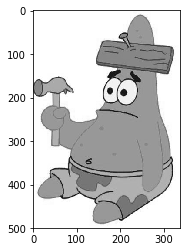

In [2]:
img=mpimg.imread('patrick.jpg')
img = img/255.0
greyImg = img[:,:,0]*0.21+img[:,:,1]*0.72+img[:,:,2]*0.07
greyImg = np.repeat(greyImg[:, :, np.newaxis], 3, axis=2)
plt.imshow(greyImg, cmap='gray')
plt.show()

Write a function that adds periodic noise, for example in horizontal bands.

In [3]:
def salt_pepper(im,ps=.1,pp=.1):
    im1=im[:,:,0].copy()
    n,m=im1.shape
    periodic = [1 if i%30<=15 else 0 for i in range(n)]
    noise_bands = np.multiply(periodic, range(n))
    for i in noise_bands:
        for j in range(m):
            b=np.random.uniform()
            if b<ps:
                im1[i,j]=0
            elif b>1-pp:
                im1[i,j]=1
    noisy_im=[[[im1[i,j]]*3 for j in range(m)] for i in range(n)]
    return noisy_im

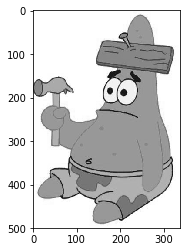

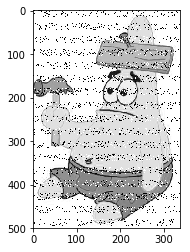

In [4]:
salty_patrick = salt_pepper(img)
plt.imshow(greyImg, cmap='gray')
plt.show() 
plt.imshow(salty_patrick, cmap='gray')
plt.show() 

In [5]:
def gauss_noise(im,p=0.5):
    im1=im[:,:,0].copy()
    n,m=im1.shape
    periodic = [[1 if i%30<=15 else 0 for j in range(m)] for i in range(n)]
    noise=np.random.normal(0,np.var(im1)**(0.5)*p,[n,m])
    noise_bands = periodic*noise
    noisy_im1=im1+noise_bands
    for i in range(n):
        for j in range(m):
            if noisy_im1[i,j]>1:
                noisy_im1[i,j]=1
            elif noisy_im1[i,j]<0:
                noisy_im1[i,j]=0
    noisy_im=[[[noisy_im1[i,j]]*3 for j in range(m)] for i in range(n)]
    return noisy_im

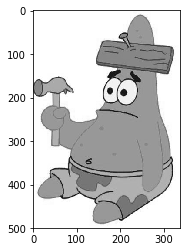

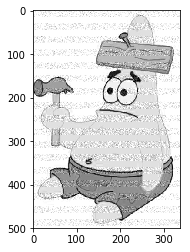

In [6]:
gaussian_patrick = gauss_noise(img)
plt.imshow(greyImg, cmap='gray')
plt.show() 
plt.imshow(gaussian_patrick, cmap='gray')
plt.show() 

Write a function that adds noise only to dark areas of an image. Read the wiki page https://en.wikipedia.org/wiki/Relative_luminance on how to determine the brightness of RGB colors.

In [7]:
def gauss_noise(im,p=0.5):
    im1=im[:,:,0].copy()
    n,m=im1.shape
    Y = img[:,:,0]*0.21+img[:,:,1]*0.72+img[:,:,2]*0.07
    mask = Y > 0.6
    noise=np.random.normal(0,np.var(im1)**(0.5)*p,[n,m])
    print len(noise[mask])
    noise[mask] = 0
    noisy_im1=im1+noise
    for i in range(n):
        for j in range(m):
            if noisy_im1[i,j]>1:
                noisy_im1[i,j]=1
            elif noisy_im1[i,j]<0:
                noisy_im1[i,j]=0
    noisy_im=[[[noisy_im1[i,j]]*3 for j in range(m)] for i in range(n)]
    return noisy_im

104570


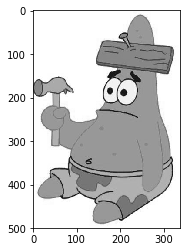

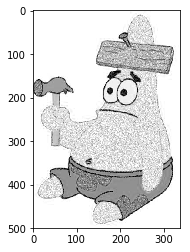

In [8]:
gaussian_patrick = gauss_noise(img)
plt.imshow(greyImg, cmap='gray')
plt.show() 
plt.imshow(gaussian_patrick, cmap='gray')
plt.show() 